In [16]:
import numpy as np
import matplotlib.pyplot as plt

# BSB

In [17]:


def run_bsb_simulation(J, steps=1000, a0=1.0, c0=1.0, dt=0.01):
    """
    Run a (bSB) simulation for solving optimization problems.
    
    Args:
        J: Coupling matrix defining the optimization problem
        steps: Number of simulation steps
        a0: System parameter (constant)
        c0: Coupling strength
        dt: Time step size
    
    Returns:
        binary_solution: The final binary solution (±1 values)
        ising_energy: The Ising energy of the final solution
        x_history: History of position values during simulation
    """
    # Get problem size
    N = J.shape[0]
    
    # Initialize positions and momenta
    x = np.random.uniform(-0.5, 0.5, N)  # Position variables
    y = np.zeros(N)                      # Momentum variables
    
    # Initialize history arrays
    x_history = np.zeros((steps + 1, N))
    x_history[0] = x.copy()
    
    # Define a(t) function - linear increase from 0 to a0
    def a_t_func(t):
        return min(a0 * t / (0.2 * steps * dt), a0)
    
    # Main simulation loop
    for step in range(1, steps + 1):
        t = step * dt
        a_t = a_t_func(t)
        
        # First part of symplectic Euler: update momenta
        # ẏ_i = -[a0 - a(t)]x_i + c0 ∑J_ij*x_j
        y -= dt * ((a0 - a_t) * x - c0 * (J @ x))
        
        # Second part: update positions
        # ẋ_i = a0 * y_i
        x += dt * a0 * y
        
        # Apply inelastic walls: for any |x_i| > 1
        outside_range = np.abs(x) > 1.0
        if np.any(outside_range):
            # Replace with sign (±1)
            x[outside_range] = np.sign(x[outside_range])
            # Set corresponding momenta to 0
            y[outside_range] = 0.0
        
        # Store current positions
        x_history[step] = x.copy()
    
    # Get binary solution by taking the sign
    binary_solution = np.sign(x)
    
    # Calculate Ising energy: -0.5 * ∑∑J_ij*s_i*s_j
    ising_energy = -0.5 * np.sum(binary_solution @ J * binary_solution)
    
    return binary_solution, ising_energy, x_history

def solve_max_cut(graph):
    """
    Solve the MAX-CUT problem for a given graph using bSB.
    
    In MAX-CUT, we want to find a partition of nodes that maximizes
    the number of edges between the two partitions.
    
    Args:
        graph: Adjacency matrix of the graph
    
    Returns:
        partition: Binary solution indicating the partition (-1 or 1 for each node)
        cut_size: Number of edges crossing between partitions
    """
    # For MAX-CUT, we minimize -∑J_ij*s_i*s_j where J = -graph
    J = -graph
    
    # Run bSB simulation
    solution, energy, _ = run_bsb_simulation(J, steps=500)
    
    # Convert Ising energy to cut size
    # The cut size equals -energy for our formulation
    cut_size = -energy
    
    return solution, cut_size

# Example usage
if __name__ == "__main__":
    # Define a simple graph as an adjacency matrix
    graph = np.array([ #[-1, 1, 1, -1, 1]
        [0, 1, 1, 0, 1],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 1, 0]
    ])

    graph = np.array([ #[-1, 1, -1, 1]
        [0, 2, 0, 1],
        [2, 0, 3, 0],
        [0, 3, 0, 1],
        [1, 0, 1, 0]
    ])
    
    # Solve MAX-CUT
    partition, cut_size = solve_max_cut(graph)
    
    # Print results
    print("Node partition:", partition)
    print("Cut size:", cut_size)
    print("Nodes in partition 1:", np.where(partition == 1)[0])
    print("Nodes in partition 2:", np.where(partition == -1)[0])

Node partition: [ 1. -1.  1. -1.]
Cut size: 7.0
Nodes in partition 1: [0 2]
Nodes in partition 2: [1 3]


# DSB

In [16]:


def run_dsb_simulation(J, steps=1000, a0=1.0, c0=1.0, dt=0.01):
    """
    Run a (bSB) simulation for solving optimization problems.
    
    Args:
        J: Coupling matrix defining the optimization problem
        steps: Number of simulation steps
        a0: System parameter (constant)
        c0: Coupling strength
        dt: Time step size
    
    Returns:
        binary_solution: The final binary solution (±1 values)
        ising_energy: The Ising energy of the final solution
        x_history: History of position values during simulation
    """
    # Get problem size
    N = J.shape[0]
    
    # Initialize positions and momenta
    x = np.random.uniform(-0.5, 0.5, N)  # Position variables
    y = np.zeros(N)                      # Momentum variables
    
    # Initialize history arrays
    x_history = np.zeros((steps + 1, N))
    x_history[0] = x.copy()
    
    # Define a(t) function - linear increase from 0 to a0
    def a_t_func(t):
        return min(a0 * t / (0.2 * steps * dt), a0)
    
    # Main simulation loop
    for step in range(1, steps + 1):
        t = step * dt
        a_t = a_t_func(t)
        
        # First part of symplectic Euler: update momenta
        # ẏ_i = -[a0 - a(t)]x_i + c0 ∑J_ij*x_j
        y -= dt * ((a0 - a_t) * x - c0 * (J @ np.sign(x)))
        
        # Second part: update positions
        # ẋ_i = a0 * y_i
        x += dt * a0 * y
        
        # Apply inelastic walls: for any |x_i| > 1
        outside_range = np.abs(x) > 1.0
        if np.any(outside_range):
            # Replace with sign (±1)
            x[outside_range] = np.sign(x[outside_range])
            # Set corresponding momenta to 0
            y[outside_range] = 0.0
        
        # Store current positions
        x_history[step] = x.copy()
    
    # Get binary solution by taking the sign
    binary_solution = np.sign(x)
    
    # Calculate Ising energy: -0.5 * ∑∑J_ij*s_i*s_j
    ising_energy = -0.5 * np.sum(binary_solution @ J * binary_solution)
    
    return binary_solution, ising_energy, x_history

def solve_max_cut(graph):
    """
    Solve the MAX-CUT problem for a given graph using bSB.
    
    In MAX-CUT, we want to find a partition of nodes that maximizes
    the number of edges between the two partitions.
    
    Args:
        graph: Adjacency matrix of the graph
    
    Returns:
        partition: Binary solution indicating the partition (-1 or 1 for each node)
        cut_size: Number of edges crossing between partitions
    """
    # For MAX-CUT, we minimize -∑J_ij*s_i*s_j where J = -graph
    J = -graph
    
    # Run bSB simulation
    solution, energy, _ = run_dsb_simulation(J, steps=500)
    
    # Convert Ising energy to cut size
    # The cut size equals -energy for our formulation
    cut_size = -energy
    
    return solution, cut_size

# Example usage
if __name__ == "__main__":
    # Define a simple graph as an adjacency matrix
    graph = np.array([ #[-1, 1, 1, -1, 1]
        [0, 1, 1, 0, 1],
        [1, 0, 0, 1, 0],
        [1, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 1, 0]
    ])

    graph = np.array([ #[-1, 1, -1, 1]
        [0, 2, 0, 1],
        [2, 0, 3, 0],
        [0, 3, 0, 1],
        [1, 0, 1, 0]
    ])
    
    # Solve MAX-CUT
    partition, cut_size = solve_max_cut(graph)
    
    # Print results
    print("Node partition:", partition)
    print("Cut size:", cut_size)
    print("Nodes in partition 1:", np.where(partition == 1)[0])
    print("Nodes in partition 2:", np.where(partition == -1)[0])

Node partition: [ 1. -1.  1. -1.]
Cut size: 7.0
Nodes in partition 1: [0 2]
Nodes in partition 2: [1 3]


# Experimental section

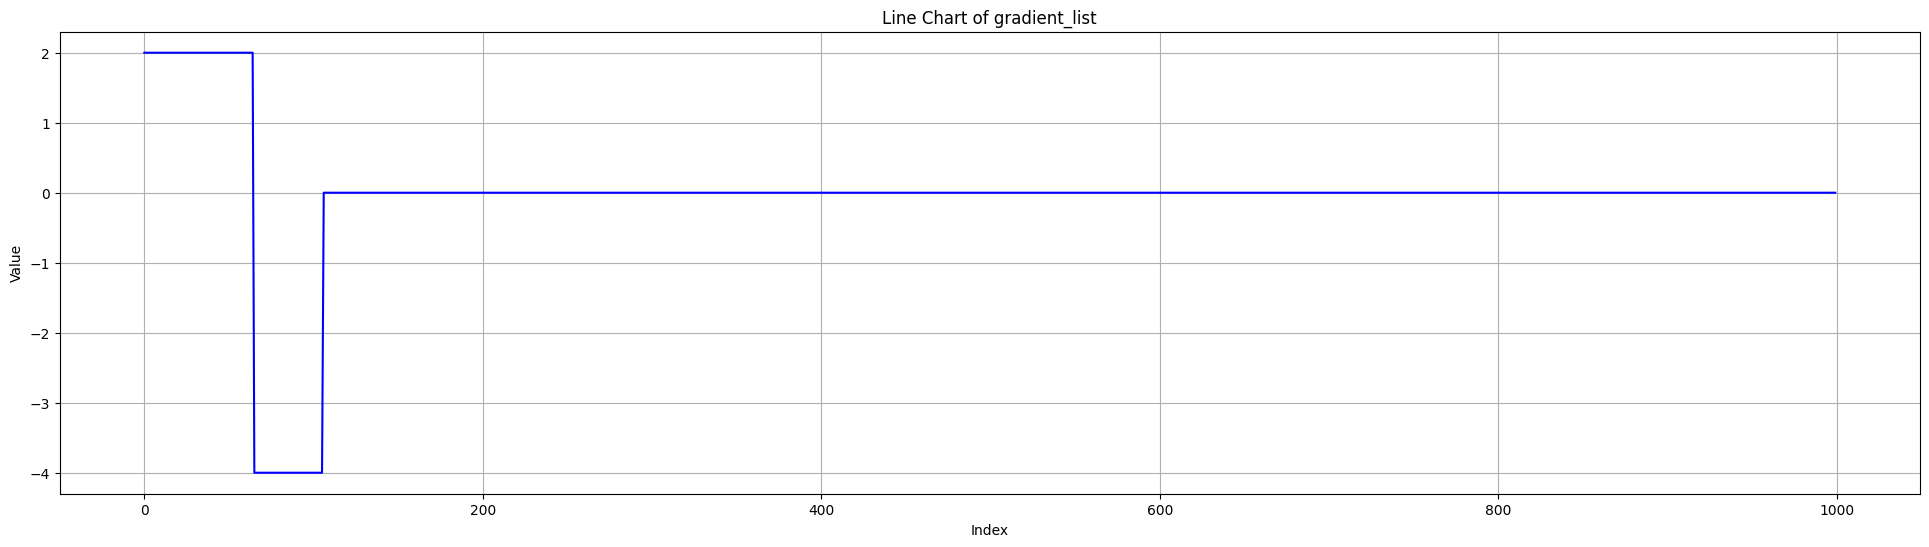

[ 1. -1.  1. -1.]


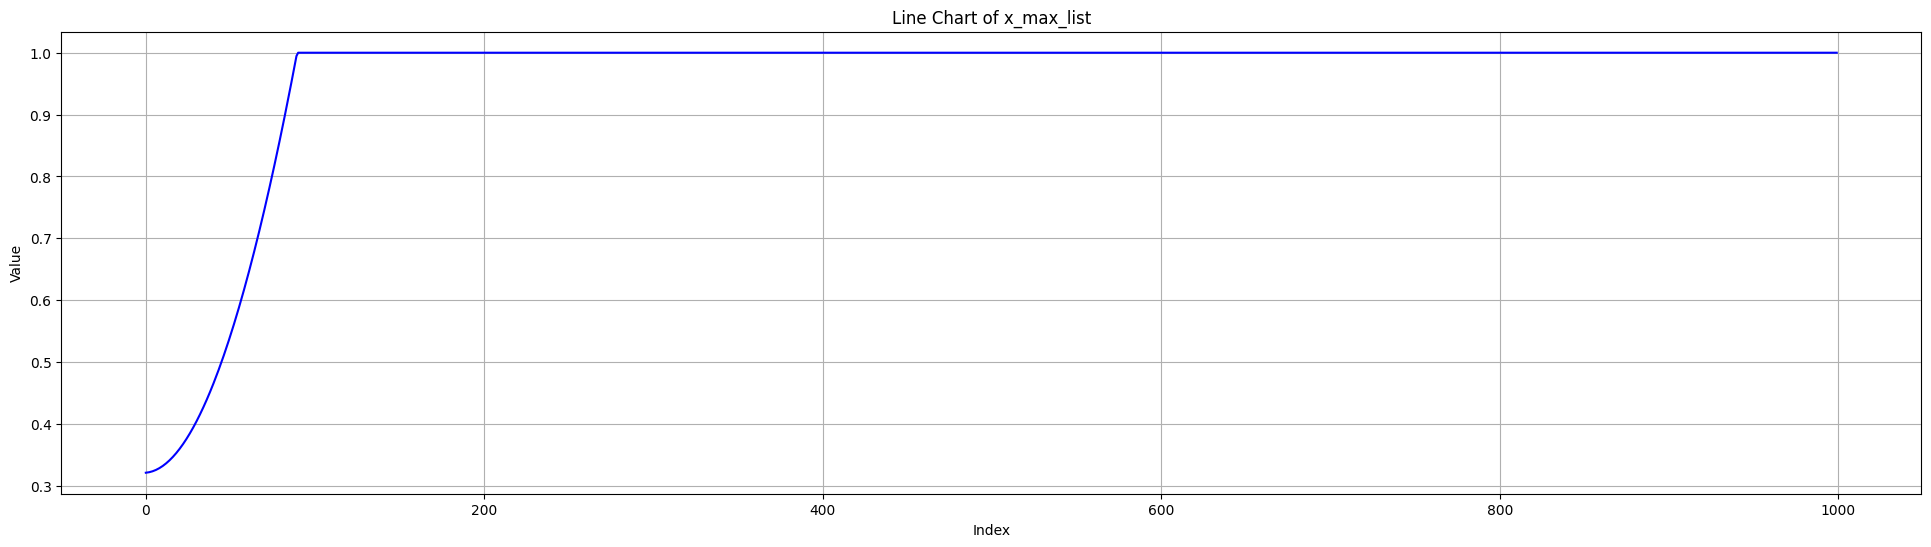

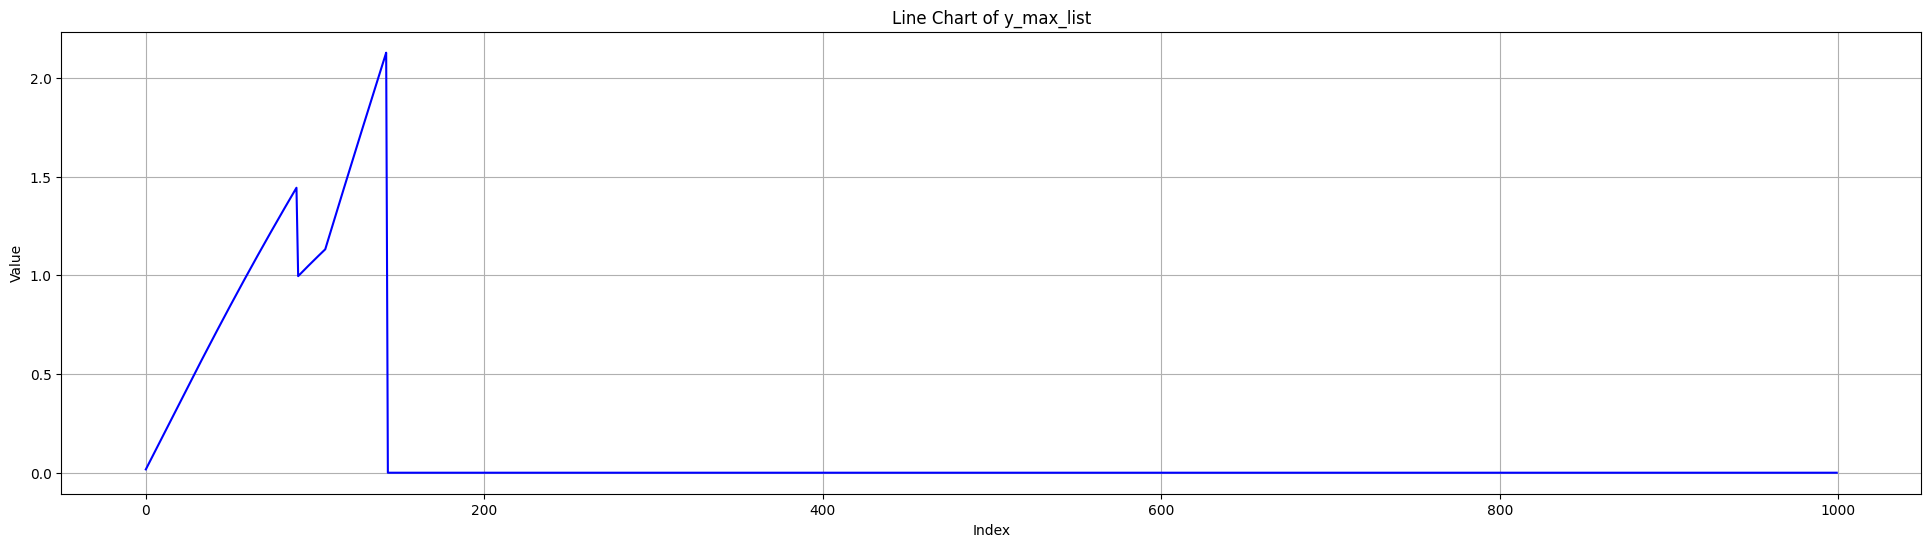

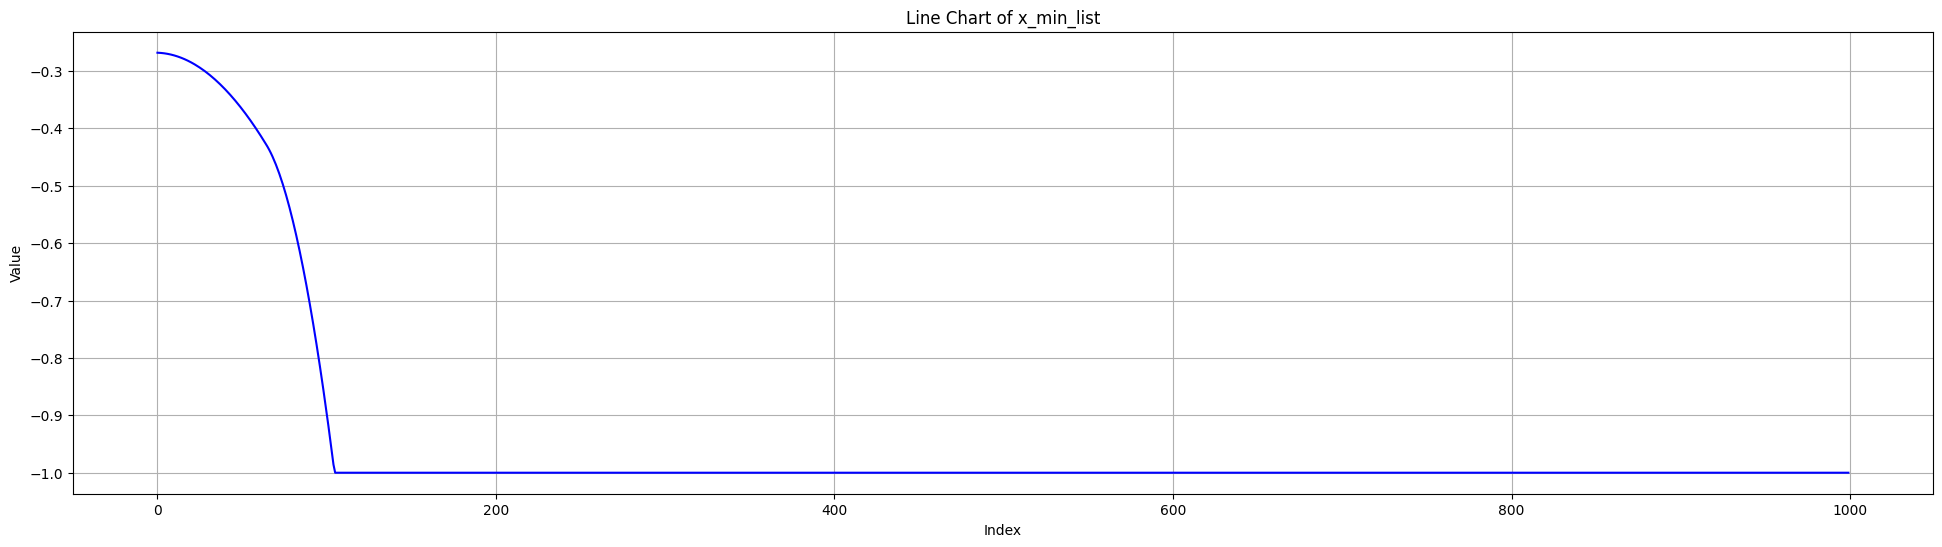

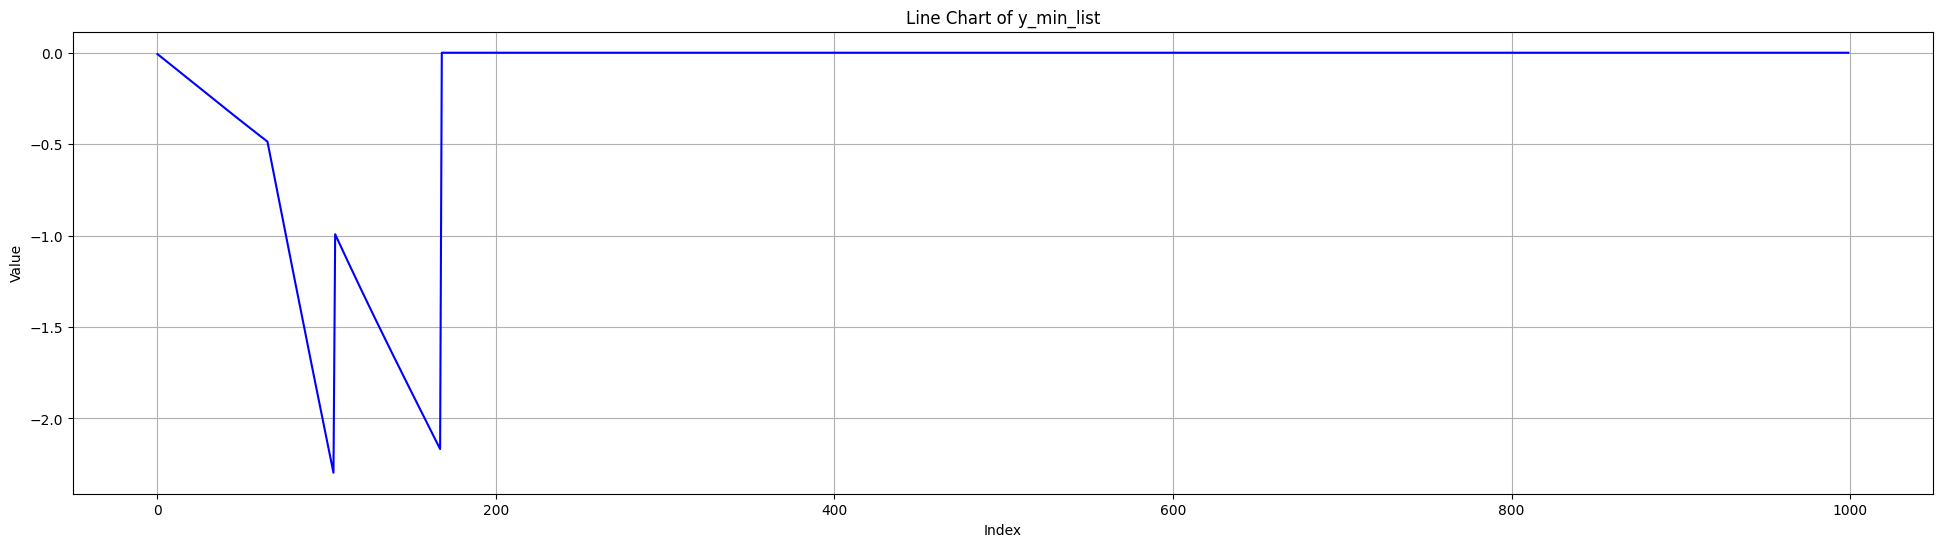

In [1]:
import numpy as np

J = -np.array([ #[-1, 1, -1, 1]
        [0, 2, 0, 1],
        [2, 0, 3, 0],
        [0, 3, 0, 1],
        [1, 0, 1, 0]
    ])

steps=1000
a0=1.0
c0=1.0 
dt=0.01
gradient_list = []
x_max_list = []
y_max_list = []
x_min_list = []
y_min_list = []

# Get problem size
N = J.shape[0]

# Initialize positions and momenta
x = np.random.uniform(-0.5, 0.5, N)  # Position variables
y = np.zeros(N)                      # Momentum variables

# Initialize history arrays
x_history = np.zeros((steps + 1, N))
x_history[0] = x.copy()

# Define a(t) function - linear increase from 0 to a0
def a_t_func(t):
    return min(a0 * t / (0.2 * steps * dt), a0)

# Main simulation loop
for step in range(1, steps + 1):
    t = step * dt
    a_t = a_t_func(t)
    
    # First part of symplectic Euler: update momenta
    # ẏ_i = -[a0 - a(t)]x_i + c0 ∑J_ij*x_j
    y -= dt * ((a0 - a_t) * x - c0 * (J @ np.sign(x)))
    
    # Second part: update positions
    # ẋ_i = a0 * y_i
    x += dt * a0 * y

    interaction_sum = (J @ np.sign(x)).sum()
    gradient_list.append(interaction_sum)
    
    # Apply inelastic walls: for any |x_i| > 1
    outside_range = np.abs(x) > 1.0
    if np.any(outside_range):
        # Replace with sign (±1)
        x[outside_range] = np.sign(x[outside_range])
        # Set corresponding momenta to 0
        y[outside_range] = 0.0
    
    # Store current positions
    x_history[step] = x.copy()

    x_max_list.append(x.max())
    y_max_list.append(y.max())
    x_min_list.append(x.min())
    y_min_list.append(y.min())

# Get binary solution by taking the sign
binary_solution = np.sign(x)

# Calculate Ising energy: -0.5 * ∑∑J_ij*s_i*s_j
ising_energy = -0.5 * np.sum(binary_solution @ J * binary_solution)

import matplotlib.pyplot as plt

plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(gradient_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of gradient_list")
plt.grid(True)
plt.show()

print(binary_solution)

plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(x_max_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of x_max_list")
plt.grid(True)
plt.show()



plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(y_max_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of y_max_list")
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(x_min_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of x_min_list")
plt.grid(True)
plt.show()



plt.figure(figsize=(24, 6))  # Set width to 24 and height to 6
plt.plot(y_min_list, linestyle='-', color='b')
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Chart of y_min_list")
plt.grid(True)
plt.show()
